In [2]:
import talib as ta
import numpy as np
import pandas as pd

def momentum(df, period=2):
    return pd.DataFrame(
    {name: ta.ROCR(item.values, period) for name, item in df.iteritems()}, index=df.index
    )

class alphas(object):
    def __init__(self, pn_data):
        if pn_data.isnull().values.any():
            pn_data.fillna(method='ffill',inplace=True)
        self.close = pd.DataFrame(pn_data.minor_xs('close'), 
                                  dtype=np.float64)

# 3. 编制因子的函数，并返回因子DataFrame
    def mom001(self):
        alpha = -1 * momentum(self.close)
        return alpha

In [3]:
# 4. 传入股票数据
import pandas as pd
import tushare as ts
from fxdayu_data import DataAPI
from datetime import datetime

In [4]:
pn = DataAPI.candle(u"家电行业", "D", start=datetime(2016, 1, 1), end=datetime(2016, 12, 31))
pn

<class 'pandas.core.panel.Panel'>
Dimensions: 36 (items) x 244 (major_axis) x 5 (minor_axis)
Items axis: 000016.XSHE to 603519.XSHG
Major_axis axis: 2016-01-04 15:00:00 to 2016-12-30 15:00:00
Minor_axis axis: close to volume

In [5]:
#5. 输出Factor数据
alpha_mom = alphas(pn).mom001()
print alpha_mom.tail()

                     000016.XSHE  000100.XSHE  000333.XSHE  000418.XSHE  \
2016-12-26 15:00:00    -0.989201    -0.971751    -0.997533    -0.979958   
2016-12-27 15:00:00    -1.006565    -0.976744    -1.006043    -0.993015   
2016-12-28 15:00:00    -0.997817    -0.956395    -0.991522    -0.989313   
2016-12-29 15:00:00    -0.980435    -0.979167    -0.990106    -0.990520   
2016-12-30 15:00:00    -0.986871    -1.003040    -1.003563    -0.997226   

                     000521.XSHE  000533.XSHE  000541.XSHE  000651.XSHE  \
2016-12-26 15:00:00    -1.015267    -1.051261    -1.006067    -0.998378   
2016-12-27 15:00:00    -1.038760    -1.058726    -1.002024    -1.036530   
2016-12-28 15:00:00    -1.001504    -1.024780    -0.991950    -1.012998   
2016-12-29 15:00:00    -1.001493    -1.001562    -0.994949    -0.994389   
2016-12-30 15:00:00    -1.039039    -1.000000    -0.996971    -0.987169   

                     000921.XSHE  002005.XSHE     ...       600060.XSHG  \
2016-12-26 15:00:00    

In [6]:
factor = alpha_mom.stack()
factor

2016-01-06 15:00:00  000016.XSHE   -0.975884
                     000100.XSHE   -1.048969
                     000333.XSHE   -1.062921
                     000418.XSHE   -1.150959
                     000521.XSHE   -1.027397
                     000533.XSHE   -1.125409
                     000541.XSHE   -0.937458
                     000651.XSHE   -1.037512
                     000921.XSHE   -1.001166
                     002005.XSHE   -0.978094
                     002032.XSHE   -0.985480
                     002035.XSHE   -1.013530
                     002076.XSHE   -0.958102
                     002260.XSHE   -0.925516
                     002290.XSHE   -0.952889
                     002403.XSHE   -0.996513
                     002429.XSHE   -0.969352
                     002508.XSHE   -1.056764
                     002543.XSHE   -0.988408
                     002668.XSHE   -1.064292
                     002677.XSHE   -1.142926
                     002681.XSHE   -1.077803
          

In [7]:
prices = pn.minor_xs('close')
prices

,000016.XSHE,000100.XSHE,000333.XSHE,000418.XSHE,000521.XSHE,000533.XSHE,000541.XSHE,000651.XSHE,000921.XSHE,002005.XSHE,...,600060.XSHG,600261.XSHG,600336.XSHG,600690.XSHG,600839.XSHG,600854.XSHG,600870.XSHG,600983.XSHG,603366.XSHG,603519.XSHG
2016-01-04 15:00:00,6.2200,3.88,29.72,24.5100,6.5700,9.1700,15.0300,20.2600,8.5800,9.1300,...,17.7300,8.13,7.4000,NaN,5.2100,7.4600,NaN,12.4100,9.7100,47.9200
2016-01-05 15:00:00,5.9500,3.97,31.33,26.9600,6.6000,9.3800,13.8000,20.8500,8.4400,8.7800,...,18.1200,8.44,7.0600,NaN,5.0199,7.1600,8.1800,12.4800,9.6500,48.1900
2016-01-06 15:00:00,6.0700,4.07,31.59,28.2100,6.7500,10.3200,14.0900,21.0200,8.5900,8.9300,...,18.4200,8.67,7.1500,NaN,5.1800,7.3900,7.7700,12.6900,9.9000,49.8500
2016-01-07 15:00:00,5.4600,3.76,29.04,25.3900,6.0900,9.3200,12.6800,19.5799,7.7500,8.0500,...,16.5799,7.85,6.4600,NaN,4.6700,6.6500,7.3800,11.4200,8.9100,44.8800
2016-01-08 15:00:00,5.4800,3.92,29.81,26.2800,6.3099,10.1600,13.0200,20.2500,7.9900,8.0500,...,16.8299,8.24,6.4500,NaN,4.7100,6.7600,7.0100,11.8200,9.0500,45.2500
2016-01-11 15:00:00,4.9300,3.75,28.40,23.6500,5.8800,9.3000,11.7200,19.3900,8.7899,7.2500,...,15.1500,8.16,5.8200,NaN,4.2699,6.1100,6.6600,11.4900,8.2300,40.7299
2016-01-12 15:00:00,4.8400,3.81,28.81,23.1400,5.9400,9.0000,11.1700,19.5500,7.9200,7.2300,...,15.0400,7.96,5.9900,NaN,4.2400,6.3000,6.3300,12.0500,8.3000,40.9500
2016-01-13 15:00:00,4.7699,3.75,28.99,23.8500,5.8000,8.1000,10.5800,19.3000,7.2300,6.8600,...,14.8500,7.81,5.7000,NaN,4.1100,6.1700,6.0100,11.3600,8.1000,38.4500
2016-01-14 15:00:00,4.8900,3.80,29.60,25.7700,5.9500,8.0600,11.0500,19.5500,7.3800,7.0500,...,15.4500,8.07,5.9900,NaN,4.2300,6.4200,5.9700,11.6800,8.3800,40.3700
2016-01-15 15:00:00,4.5300,3.60,28.39,23.1900,5.6600,7.5900,10.4800,18.8000,6.8600,6.5400,...,14.6600,7.99,5.8000,NaN,3.9300,6.0100,5.9500,10.9800,8.0100,37.6000


In [11]:
import alphalens

factor_data = alphalens.utils.get_clean_factor_and_forward_returns(factor, prices, quantiles=3)

In [12]:
factor_data

1         5        10    factor  \
date                asset                                                 
2016-01-06 15:00:00 000016.XSHE -0.100494 -0.214185 -0.153213 -0.975884   
                    000100.XSHE -0.076167 -0.078624 -0.115479 -1.048969   
                    000333.XSHE -0.080722 -0.082305 -0.112694 -1.062921   
                    000418.XSHE -0.099965 -0.154555 -0.207728 -1.150959   
                    000521.XSHE -0.097778 -0.140741 -0.120000 -1.027397   
                    000533.XSHE -0.096899 -0.215116 -0.207364 -1.125409   
                    000541.XSHE -0.100071 -0.249113 -0.194464 -0.937458   
                    000651.XSHE -0.068511 -0.081827 -0.082778 -1.037512   
                    000921.XSHE -0.097788 -0.158324 -0.144354 -1.001166   
                    002005.XSHE -0.098544 -0.231803 -0.228443 -0.978094   
                    002032.XSHE -0.051958 -0.019000 -0.029469 -0.985480   
                    002035.XSHE -0.099515 -0.180218 -0.101942 -1.013530   
                    002076.XSHE -0.099678 -0.234727 -0.212862 -0.958102   
                    002260.XSHE -0.099867 -0.177424 -0.076760 -0.925516   
                    002290.XSHE -0.099964 -0.214002 -0.156983 -0.952889   
                    002403.XSHE -0.100070 -0.243527 -0.179846 -0.996513   
                    002429.XSHE -0.100271 -0.230352 -0.205059 -0.969352   
                    002508.XSHE -0.078335 -0.105416 -0.101388 -1.056764   
                    002543.XSHE -0.100000 -0.135802 -0.080247 -0.988408   
                    002668.XSHE -0.100013 -0.247775 -0.146510 -1.064292   
                    002677.XSHE -0.100038 -0.318463 -0.326383 -1.142926   
                    002681.XSHE -0.100024 -0.283322 -0.201699 -1.077803   
                    002705.XSHE -0.093229 -0.101562 -0.056250 -1.018028   
                    002723.XSHE -0.099767 -0.278322 -0.176224 -0.945767   
                    600060.XSHG -0.099897 -0.193811 -0.181325 -1.038917   
                    600261.XSHG -0.094579 -0.099193 -0.004614 -1.066421   
                    600336.XSHG -0.096503 -0.202797 -0.156643 -0.966216   
                    600839.XSHG -0.098456 -0.206564 -0.200772 -0.994242   
                    600854.XSHG -0.100135 -0.165088 -0.147497 -0.990617   
                    600983.XSHG -0.100079 -0.104807 -0.126084 -1.022562   
...                                   ...       ...       ...       ...   
2016-12-16 15:00:00 000541.XSHE -0.010091 -0.003027 -0.007064 -0.991992   
                    000651.XSHE -0.033209 -0.036011 -0.014802 -0.987743   
                    000921.XSHE  0.001003  0.002006  0.024072 -1.000000   
                    002005.XSHE -0.001716  0.001750 -0.003449 -1.012263   
                    002032.XSHE -0.021935  0.005409  0.049279 -1.016807   
                    002035.XSHE -0.018421 -0.031955 -0.024436 -0.995509   
                    002076.XSHE  0.005299  0.036336  0.024224 -1.020077   
                    002242.XSHE  0.006518 -0.009777 -0.020641 -1.006011   
                    002260.XSHE  0.000000  0.000000  0.000000 -1.000000   
                    002290.XSHE  0.010700  0.041908  0.006683 -1.011728   
                    002403.XSHE -0.016722 -0.024080 -0.022074 -1.016315   
                    002429.XSHE -0.023538 -0.046163 -0.098643 -1.022202   
                    002473.XSHE  0.031785  0.014670 -0.002794 -1.029856   
                    002508.XSHE  0.008625  0.043684  0.023929 -0.968994   
                    002543.XSHE -0.004058 -0.012174  0.008696 -1.007005   
                    002668.XSHE  0.003901 -0.048114 -0.077373 -1.108069   
                    002677.XSHE  0.046127  0.013925  0.018277 -1.013228   
                    002681.XSHE  0.000000  0.000000  0.000000 -1.022134   
                    002705.XSHE  0.000000 -0.021340  0.002371 -1.013822   
                    002723.XSHE -0.002385  0.007552  0.003577 -1.050083   
                    600060.XSHG  0.004142 -0.005917  0.013018 -0.

In [13]:
mean_return_by_q, std_err_by_q = alphalens.performance.mean_return_by_quantile(factor_data, by_date=True)
print(mean_return_by_q).head()
print(std_err_by_q).head()

                                           1         5         10
factor_quantile date                                             
1               2016-01-06 15:00:00  0.001353 -0.002502 -0.012857
                2016-01-07 15:00:00  0.018425  0.013933 -0.001985
                2016-01-08 15:00:00  0.014663  0.017300 -0.007444
                2016-01-11 15:00:00  0.006493 -0.012574 -0.007468
                2016-01-12 15:00:00  0.005944 -0.009779  0.002225
                                           1         5         10
factor_quantile date                                             
1               2016-01-06 15:00:00  0.002946  0.025357  0.024575
                2016-01-07 15:00:00  0.009068  0.025270  0.027773
                2016-01-08 15:00:00  0.009261  0.026412  0.028818
                2016-01-11 15:00:00  0.012812  0.020700  0.022745
                2016-01-12 15:00:00  0.009257  0.014203  0.017545


/Users/calvinku/anaconda/envs/fxdayu/lib/python2.7/site-packages/alphalens/plotting.py:767: FutureWarning: pd.rolling_apply is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,min_periods=1,window=5).apply(args=<tuple>,func=<function>,kwargs=<dict>)
  min_periods=1, args=(period,))
/Users/calvinku/anaconda/envs/fxdayu/lib/python2.7/site-packages/alphalens/plotting.py:767: FutureWarning: pd.rolling_apply is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,min_periods=1,window=10).apply(args=<tuple>,func=<function>,kwargs=<dict>)
  min_periods=1, args=(period,))


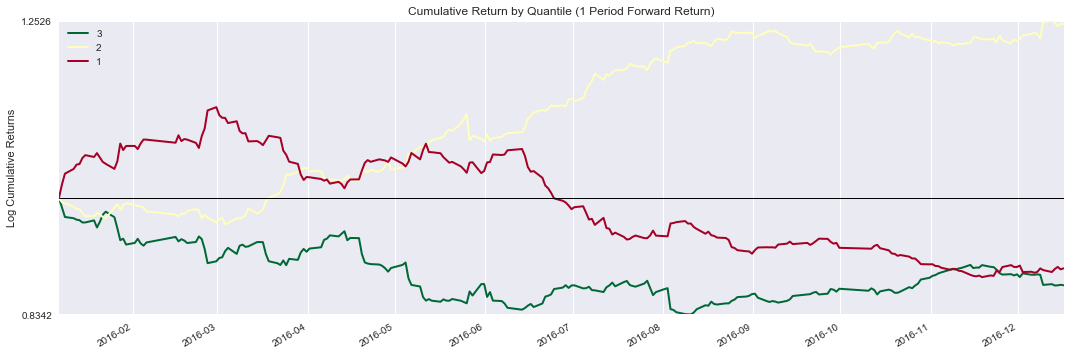

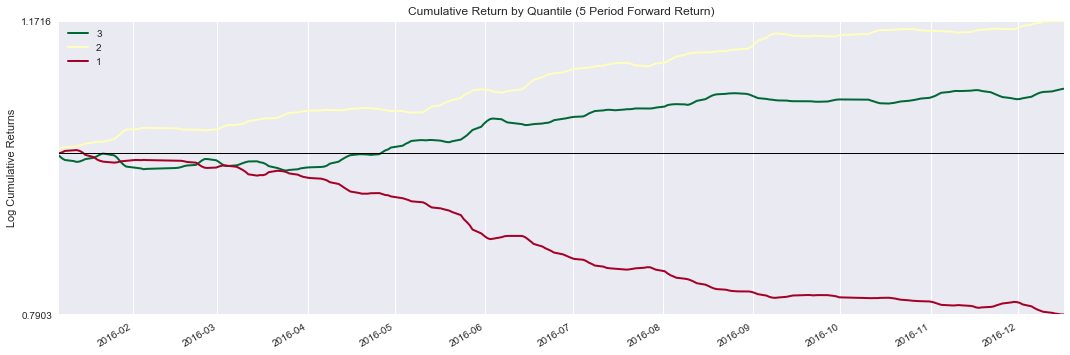

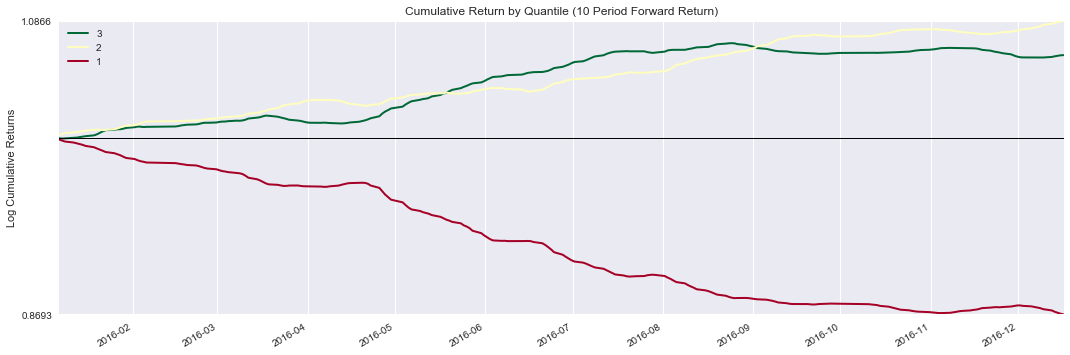

In [14]:
import matplotlib.pyplot as plt

alphalens.plotting.plot_cumulative_returns_by_quantile(mean_return_by_q, 1)
alphalens.plotting.plot_cumulative_returns_by_quantile(mean_return_by_q, 5)
alphalens.plotting.plot_cumulative_returns_by_quantile(mean_return_by_q, 10)
plt.show()